In [1]:
from keras.datasets import reuters

(train_data,train_labels),(test_data,test_labels)=reuters.load_data(num_words=10000)

C:\Users\Alekh\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


2113536/2110848 [==============================] - 8s 4us/step


In [3]:
print(train_data.shape)
print(test_data.shape)

(8982,)
(2246,)


### Preparing Data

In [4]:
import numpy as np

def vectorize_sequences(sequences,dim=10000):
    results=np.zeros((len(sequences),dim))
    for i, seq in enumerate(sequences):
        results[i,seq]=1
    return results

In [5]:
x_train=vectorize_sequences(train_data)
x_test=vectorize_sequences(test_data)

In [6]:
## Labels to One hot encoding

from keras.utils.np_utils import to_categorical

one_hot_train_labels=to_categorical(train_labels)
one_hot_test_labels=to_categorical(test_labels)

#### Model Definition

In [8]:
from keras import models
from keras import layers

model=models.Sequential()
model.add(layers.Dense(64,activation='relu',input_shape=(10000,)))
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(46,activation='softmax'))

In [9]:
model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])

#### Validation

In [11]:
x_val=x_train[:1000]
y_val=one_hot_train_labels[:1000]

partial_x_train=x_train[1000:]
partial_y_train=one_hot_train_labels[1000:]

#### Training the model

In [12]:
history=model.fit(partial_x_train,partial_y_train,epochs=20,batch_size=512,validation_data=(x_val,y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 3s 388us/step - loss: 2.5245 - acc: 0.4979 - val_loss: 1.7182 - val_acc: 0.6120
Epoch 2/20
7982/7982 [==============================] - 2s 286us/step - loss: 1.4438 - acc: 0.6885 - val_loss: 1.3471 - val_acc: 0.7080
Epoch 3/20
7982/7982 [==============================] - 2s 284us/step - loss: 1.0960 - acc: 0.7646 - val_loss: 1.1724 - val_acc: 0.7420
Epoch 4/20
7982/7982 [==============================] - 2s 282us/step - loss: 0.8707 - acc: 0.8163 - val_loss: 1.0824 - val_acc: 0.7570
Epoch 5/20
7982/7982 [==============================] - 2s 293us/step - loss: 0.7046 - acc: 0.8492 - val_loss: 0.9857 - val_acc: 0.7810
Epoch 6/20
7982/7982 [==============================] - 2s 297us/step - loss: 0.5685 - acc: 0.8794 - val_loss: 0.9410 - val_acc: 0.8040
Epoch 7/20
7982/7982 [==============================] - 2s 289us/step - loss: 0.4618 - acc: 0.9029 - val_loss: 0.9097 - val_acc: 0.8030


#### Plotting Training and Validation Loss

In [14]:
% matplotlib inline

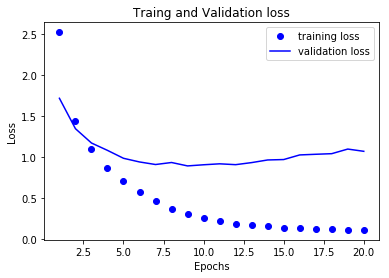

In [15]:
import matplotlib.pyplot as plt

history_dict=history.history
loss_values=history_dict['loss']
val_loss_values=history_dict['val_loss']

epochs=range(1,len(loss_values)+1)

plt.plot(epochs,loss_values,'bo',label='training loss')
plt.plot(epochs,val_loss_values,'b',label='validation loss')
plt.title('Traing and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [19]:
history_dict.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

#### Plotting Accuracy

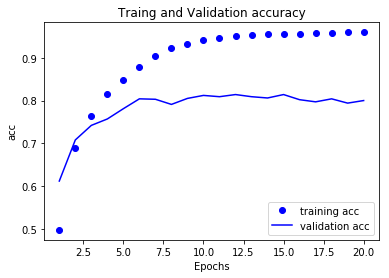

In [20]:
plt.clf()

history_dict=history.history
acc_values=history_dict['acc']
val_acc_values=history_dict['val_acc']

epochs=range(1,len(acc_values)+1)

plt.plot(epochs,acc_values,'bo',label='training acc')
plt.plot(epochs,val_acc_values,'b',label='validation acc')
plt.title('Traing and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('acc')
plt.legend()

plt.show()

#### Retraining a model from scratch

In [21]:
model=models.Sequential()
model.add(layers.Dense(64,activation='relu',input_shape=(10000,)))
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(46,activation='softmax'))

model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])

model.fit(partial_x_train,partial_y_train,epochs=9,batch_size=512,validation_data=(x_val,y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/9
7982/7982 [==============================] - 4s 443us/step - loss: 2.5402 - acc: 0.5226 - val_loss: 1.6786 - val_acc: 0.6540
Epoch 2/9
7982/7982 [==============================] - 3s 328us/step - loss: 1.3777 - acc: 0.7100 - val_loss: 1.2807 - val_acc: 0.7230
Epoch 3/9
7982/7982 [==============================] - 3s 323us/step - loss: 1.0197 - acc: 0.7784 - val_loss: 1.1342 - val_acc: 0.7500
Epoch 4/9
7982/7982 [==============================] - 3s 323us/step - loss: 0.8017 - acc: 0.8247 - val_loss: 1.0535 - val_acc: 0.7590
Epoch 5/9
7982/7982 [==============================] - 2s 302us/step - loss: 0.6420 - acc: 0.8623 - val_loss: 0.9760 - val_acc: 0.7950
Epoch 6/9
7982/7982 [==============================] - 2s 302us/step - loss: 0.5137 - acc: 0.8918 - val_loss: 0.9104 - val_acc: 0.8130
Epoch 7/9
7982/7982 [==============================] - 2s 298us/step - loss: 0.4131 - acc: 0.9151 - val_loss: 0.8917 - val_acc: 0.8200
Epoch 8

In [22]:
results=model.evaluate(x_test,one_hot_test_labels)

2246/2246 [==============================] - 1s 328us/step


In [23]:
results

[1.0233855767644948, 0.7764915405695499]

#### Generating Predictions on New data

In [24]:
predictions=model.predict(x_test)

In [25]:
predictions[0].shape

(46,)

In [26]:
np.sum(predictions[0])

1.0000001

In [27]:
np.argmax(predictions[0])

3

#### Different way to Handle the labels and Loss 

In [28]:
y_train=np.array(train_labels)
y_test=np.array(test_labels)

model.compile(optimizer='rmsprop',loss='sparse_categorical_crossentropy',metrics=['acc'])

In [29]:
x_val=x_train[:1000]
y_val=y_train[:1000]

partial_x_train=x_train[1000:]
partial_y_train=y_train[1000:]

In [31]:
model=models.Sequential()
model.add(layers.Dense(64,activation='relu',input_shape=(10000,)))
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(46,activation='softmax'))
model.compile(optimizer='rmsprop',loss='sparse_categorical_crossentropy',metrics=['acc'])
model.fit(partial_x_train,partial_y_train,epochs=20,batch_size=512,validation_data=(x_val,y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 4s 442us/step - loss: 2.7418 - acc: 0.5013 - val_loss: 1.8187 - val_acc: 0.6140
Epoch 2/20
7982/7982 [==============================] - 3s 329us/step - loss: 1.4613 - acc: 0.6968 - val_loss: 1.3519 - val_acc: 0.7040
Epoch 3/20
7982/7982 [==============================] - 2s 313us/step - loss: 1.0710 - acc: 0.7746 - val_loss: 1.1659 - val_acc: 0.7460
Epoch 4/20
7982/7982 [==============================] - 3s 329us/step - loss: 0.8428 - acc: 0.8234 - val_loss: 1.0511 - val_acc: 0.7750
Epoch 5/20
7982/7982 [==============================] - 3s 369us/step - loss: 0.6766 - acc: 0.8586 - val_loss: 0.9759 - val_acc: 0.7940
Epoch 6/20
7982/7982 [==============================] - 3s 375us/step - loss: 0.5393 - acc: 0.8871 - val_loss: 0.9370 - val_acc: 0.7960
Epoch 7/20
7982/7982 [==============================] - 3s 321us/step - loss: 0.4323 - acc: 0.9094 - val_loss: 0.9511 - val_acc: 0.7910


In [32]:
predictions=model.predict(x_test)

In [33]:
predictions[0].shape

(46,)

In [50]:
predictions[6].argmax()

3

In [40]:
train_labels[0:10]

array([ 3,  4,  3,  4,  4,  4,  4,  3,  3, 16], dtype=int64)

In [51]:
predictions.shape

(2246, 46)

In [53]:
results=[]
for i,pred in enumerate(predictions):
    results.append(pred.argmax())
results=np.array(results)

In [56]:
results

array([ 3, 10,  1, ...,  3,  4,  1], dtype=int64)

In [57]:
results.shape

(2246,)

In [58]:
import os
os.getcwd()

'C:\\Users\\Alekh\\Desktop\\Python'